In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# fetch data from mysql

db = mysql.connector.connect(host = 'localhost',username = 'root',password='9651',database='ecommerce')
curr = db.cursor()

In [47]:
 # Q1. List all unique cities where customers are located.
    
query = """ select distinct customer_city from customers """

curr.execute(query)
data =curr.fetchall()
df  = pd.DataFrame(data)
df.head()



,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


In [19]:
# Q2. Count the number of orders placed in 2017.
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""
curr.execute(query)
data = curr.fetchall()

#print
# data
#print data
# data[0]
# print value
"Total  orders placed in 2017 are: ",data[0][0]


('Total  orders placed in 2017 are: ', 180404)

In [23]:
# Q3. Find the total sales per category.

query = """ select upper(products.product_category) as category,
round(sum(payments.payment_value),2) as sales
from products join order_items
on products.product_id= order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category 
"""
curr.execute(query)
data = curr.fetchall()
df = pd.DataFrame(data, columns= ["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,18242591.76
1,FURNITURE DECORATION,51486350.10
2,TELEPHONY,17527753.83
3,BED TABLE BATH,61651932.16
4,AUTOMOTIVE,30682595.92
...,...,...
69,CDS MUSIC DVDS,43179.48
70,LA CUISINE,104887.08
71,FASHION CHILDREN'S CLOTHING,28284.12
72,PC GAMER,78279.48


In [30]:
# Q4 Calculate the percentage of orders that were paid in installments.
query = """ select sum(case when payments.payment_installments >= 1 then 1 else 0 end)/ count(*)*100 from payments
"""
curr.execute(query)
data  =curr.fetchall()
"The percentage of orders that were paid in installments is: ",data[0][0]

('The percentage of orders that were paid in installments is: ',
 [(Decimal('99.9981'),)])

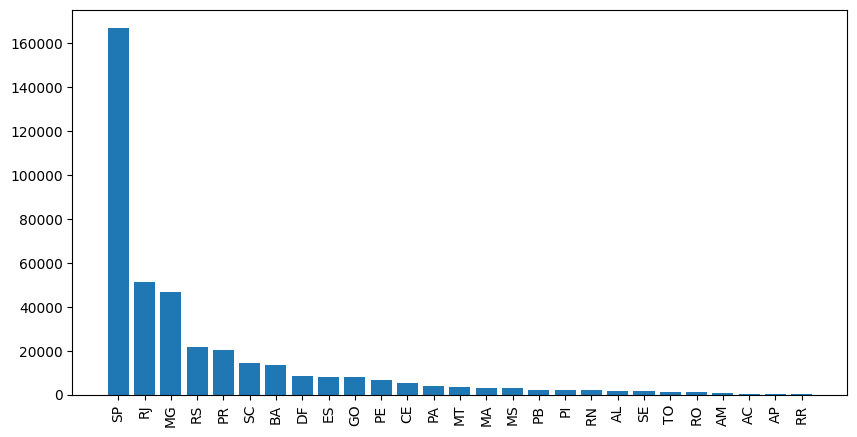

In [46]:
# Count the number of customers from each state
query = """ select customer_state,count(customers.customer_id) from customers group by customer_state """
curr.execute(query)
data = curr.fetchall()
df =pd.DataFrame(data, columns = ["State","Members"])
#print(df)
df = df.sort_values(by = "Members",ascending = False)
plt.figure(figsize = (10,5))
plt.bar(df["State"],df["Members"])
plt.xticks(rotation = 90)

plt.show()
